In [2]:
import wikipedia as wp
from bs4 import BeautifulSoup
import requests
import re
from pprint import pprint
import networkx as nx
from collections import deque
import pandas as pd
import matplotlib.pyplot as plt

# Existing Appraoches:
 - Brute force
 - Parsing XML with Python
 - Parsing XML with XQuery / XPath
 - Regular Expression

*** For the sake of time saving, we follow the brute force appraoch

There is one tint problem with the wikipedia pages that "See also" part does not contain only items and some descriptions accompany the elements as well (e.g. https://en.wikipedia.org/wiki/Foreign_electoral_intervention). The code cannot parse such pages completely; however, the number of them is very few (less than 10 in 1000) 

In [3]:
def seeAlsoElementsCollector(term):
    try:
        soup = BeautifulSoup(requests.get(wp.page(term).url).content, 'html.parser')
        wholePage = soup.prettify()
        firstClueIndex = wholePage.find("<span class=\"mw-headline\" id=\"See_also\">")
        firstPart = wholePage[firstClueIndex:]
        secondClueIndex = firstPart.find("<li>")
        secondPart = firstPart[secondClueIndex:]
        thirdClueIndex = secondPart.find("<h2")
        thirdPart = secondPart[0:thirdClueIndex]
        
        try:
            index11 = [m.start() for m in re.finditer("<a", thirdPart)]
            index21 = [m.start() for m in re.finditer("<div", thirdPart)]
            fourthPart = thirdPart[index11[0]:index21[0]]
        except:
            fourthPart = thirdPart
        seeAlsos = []
        for element in re.findall(r'wiki.*title.*>', fourthPart, re.MULTILINE):
            index1 = [m.start() for m in re.finditer("wiki", element)]
            index2 = [m.start() for m in re.finditer("title", element)]
            seeAlsos.append(element[index1[0]+5:index2[0]-2])
        return [item.replace("_"," ").replace("-"," ").lower().strip() for item in seeAlsos]
    except:
        print("An unexpected Error happened!"+str(term))
        return []

In [4]:
edges = {}
graph = nx.DiGraph()
# q = 0
# seeds = deque(["misinformation","disinformation","hoax"])
# #                "urban legend","fack checking","factoid","Alternative fact","hoax"])
# seeds = deque(["rumor","gossip","misinformation","disinformation","fake news",
#                "urban legend","fack checking","factoid","Alternative fact","hoax"])
# seeds = deque( ["People's Party for Freedom and Democracy" , "Party for Freedom" , "Christian Democratic Appeal" , "Democrats 66" , "GroenLinks" , "Socialist Party" , "Labour Party" , "Christian Union" , "Party for the Animals" , "50PLUS" , "Reformed Political Party" , "Denk" , "Forum for Democracy"])

# seeds = deque( ["rumor", "gossip", "misinformation", "disinformation", "fake news", 
#                 "urban legend", "hoax", "fact checking", "factoid", "fallacy", "propaganda"])


# seeds = deque(["rumor","gossip","misinformation","disinformation","fake news","urban legend","hoax","fact checking","factoid"])

# seeds = deque( ["شایعه"])

seeds = deque( ["lie"])

dummyList = [0 for a in seeds]
bin = []
dup1 = 0
dup2 = 0

df = pd.DataFrame(columns=["Total Topics", "Added Topics"])

for counter,it in enumerate(dummyList):

    item = seeds.popleft()
    item = item.replace("%27","'")
    bin.append(item)
    itemSeeAlso = seeAlsoElementsCollector(item)

    print(f'{counter} - {item}')
    for topic in itemSeeAlso:
        if topic != "":
            if ((item, topic) in edges.keys()):
                edges[(item, topic)] += 1
                dup1 += 1
                print(f'{counter} $$$ {item} $$$ {topic} $$$ {(item, topic)}')
            else:
                edges[(item, topic)] = 1
            graph.add_edge(item, topic)
        else:
            dup2 += 1
            print(f'{counter} @@@ {item} @@@ {topic}')

    addedTopics = 0
    for y in itemSeeAlso :
        if y not in bin and y not in seeds:
            seeds.append(y)
            dummyList.append(0)
            addedTopics += 1
    
    df.loc[counter] = [len(seeds), addedTopics]    
    
    if len(bin) == 500:
        break

0 - lie
1 - sophistry
2 - white horse dialogue
3 - non denial denial
4 - non apology apology
5 - false analogy
6 - false equivalence
7 - rhetoric
8 - appeal to emotion
9 - scapegoating
10 - blame#victim blaming
11 - blame#blame shifting
12 - fall guy
13 - identified patient
14 - ingroups and outgroups
15 - association fallacy
16 - stereotype
17 - doublespeak
18 - if by whiskey
19 - loaded language
20 - glittering generality
21 - plausible deniability
22 - evasion (ethics)
23 - weasel word
24 - no true scotsman#examples
25 - post truth politics
26 - vacuous truth
27 - equivocation
28 - alternative facts
29 - false balance
30 - disinformation
31 - black propaganda
32 - tui (intellectual)
33 - fabrication (science)
34 - betrayal#double cross
35 - deception
36 - propaganda
37 - spin (public relations)
38 - confabulation
39 - ethics
40 - falsifiability
41 - honesty
41 $$$ honesty $$$ authenticity (philosophy) $$$ ('honesty', 'authenticity (philosophy)')
42 - mental reservation
43 - narcissi

D:\Users\aebrahimifard\AppData\Local\Continuum\anaconda3\envs\myenv01\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file D:\Users\aebrahimifard\AppData\Local\Continuum\anaconda3\envs\myenv01\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


An unexpected Error happened!retraction
344 - retraction
345 - junk science
346 - adultery
347 - creonte
348 - infidelity
349 - liar
350 - opportunism
351 - psalm 54
352 - psychological abuse
353 - splitting (psychology)
An unexpected Error happened!stab in the back legend
354 - stab in the back legend
355 - academic dishonesty
356 - battleplan
357 - communications deception
358 - crowd manipulation
359 - deception (criminal law)
360 - deception in animals
361 - electronic deception
362 - fear, uncertainty and doubt
363 - forgery
364 - fraud
365 - hoax
366 - limited hangout
367 - machiavellianism
368 - media transparency
An unexpected Error happened!misdirection (disambiguation)
369 - misdirection (disambiguation)
370 - outline of public relations
371 - phishing
372 - placebo
373 - plagiarism
374 - secrecy
375 - simulated reality
376 - smoke and mirrors
377 - socioemotional selectivity theory
378 - spectacle
379 - steganography
380 - sting operation
381 - swampland in florida
382 - tru

<Figure size 432x288 with 0 Axes>

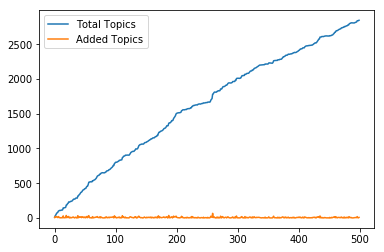

<Figure size 432x288 with 0 Axes>

In [5]:
%matplotlib inline
df.plot()
plt.figure()

In [6]:
nx.write_gexf(graph,"graph_500_v4.gexf")